In [1]:
!pip install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [5]:
!pip install ultralytics

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\hp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-23 Python-3.8.3 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
img ='https://ultralytics.com/images/zidane.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1034.5ms pre-process, 232.4ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


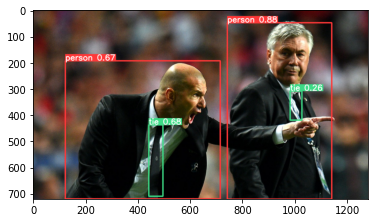

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

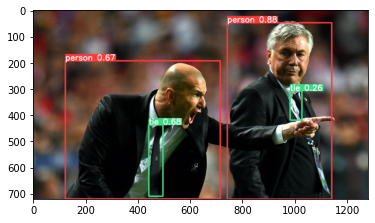

In [11]:
plt.imshow(np.squeeze(results.render()))

In [12]:
img = 'https://video-images.vice.com/articles/5a3012d2d093cb56558b9bb1/lede/1513100039285-shutterstock_667307533.jpeg?crop=1xw:0.843328335832084xh;center,center&resize=1200:*'

In [13]:
results = model(img)
results.print()

image 1/1: 674x1200 1 person, 38 cars, 3 buss, 1 truck, 1 traffic light
Speed: 244.3ms pre-process, 192.5ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


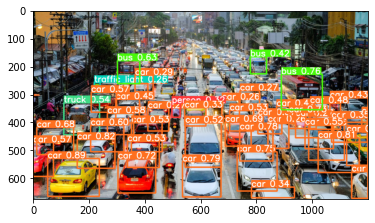

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
import uuid   # Unique identifier
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [19]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows() 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [18]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Requirement already up-to-date: pyqt5 in c:\users\hp\anaconda3\lib\site-packages (5.15.9)
Requirement already up-to-date: lxml in c:\users\hp\anaconda3\lib\site-packages (4.9.2)


In [21]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\hp\D

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:02<00:02,  2.20s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.23s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.38s/it]
                   all         40         40          0          0          0          0

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
      3/299         0G    0.09518    0.02209    0.06955         34        320:   0%|          | 0/3 [00:03<?, ?it/s]
      3/299         0G    0.09518    0.02209    0.06955         34        320:  33%|###3      | 1/3 [00:03<00:07,  3.74s/it]
      3/299    

     18/299         0G     0.0662    0.01953    0.03396         17        320:  67%|######6   | 2/3 [00:08<00:03,  3.25s/it]
     18/299         0G     0.0662    0.01953    0.03396         17        320: 100%|##########| 3/3 [00:08<00:00,  2.59s/it]
     18/299         0G     0.0662    0.01953    0.03396         17        320: 100%|##########| 3/3 [00:08<00:00,  2.77s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:02<00:02,  2.35s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.32s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.47s/it]
                   all         40         40      0.256       0.75      0.334     0.0697

                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:02<00:02,  2.12s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.18s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.32s/it]
                   all         40         40      0.421          1      0.685      0.405

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
     62/299         0G    0.04136     0.0162    0.03013         41        320:   0%|          | 0/3 [00:03<?, ?it/s]
     62/299         0G    0.04136     0.0162    0.03013         41        320:  33%|###3      | 1/3 [00:03<00:06,  3.13s/it]
     62/299         0G    0.04065    0.01427    0.03025         30        320:  33%|###3      | 1/3 [00:06<00:06,  3.13s/it]
     62/299       

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
     84/299         0G    0.03904   0.009112    0.02881         28        320:   0%|          | 0/3 [00:03<?, ?it/s]
     84/299         0G    0.03904   0.009112    0.02881         28        320:  33%|###3      | 1/3 [00:03<00:06,  3.12s/it]
     84/299         0G    0.04032    0.01014    0.02815         35        320:  33%|###3      | 1/3 [00:06<00:06,  3.12s/it]
     84/299         0G    0.04032    0.01014    0.02815         35        320:  67%|######6   | 2/3 [00:06<00:03,  3.24s/it]
     84/299         0G    0.04117    0.01118    0.02883         19        320:  67%|######6   | 2/3 [00:08<00:03,  3.24s/it]
     84/299         0G    0.04117    0.01118    0.02883         19        320: 100%|##########| 3/3 [00:08<00:00,  2.53s/it]
     84/299         0G    0.04117    0.01118    0.02883         19        320: 100%|##########| 3/3 [00:08<00:00,  2.71s/it]

               

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  50%|#####     | 1/2 [00:02<00:02,  2.03s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.15s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 2/2 [00:02<00:00,  1.28s/it]
                   all         40         40      0.996          1      0.995      0.871

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
    224/299         0G    0.02435   0.008795   0.008498         42        320:   0%|          | 0/3 [00:03<?, ?it/s]
    224/299         0G    0.02435   0.008795   0.008498         42        320:  33%|###3      | 1/3 [00:03<00:06,  3.29s/it]
    224/299    

In [29]:
import subprocess
ziploc = "C:\Users\hp\.cache\torch\hub\master.zip" #location where 7zip is installed
cmd = [ziploc, 'e',master.zip ,'-o'+ OutputDirectory ,'-r' ] 
sp = subprocess.Popen(cmd, stderr=subprocess.STDOUT, stdout=subprocess.PIPE)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-29-b82a5d3458f5>, line 2)

In [22]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hp/.cache\torch\hub\master.zip


BadZipFile: File is not a zip file

In [23]:
img = os.path.join('data', 'images', 'awake.6bce4ff2-ce22-11ed-949e-c8b29b1f9b30.jpg')

In [24]:
results = model(img)

In [25]:
results.print()

image 1/1: 480x640 1 awake
Speed: 12.0ms pre-process, 223.4ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


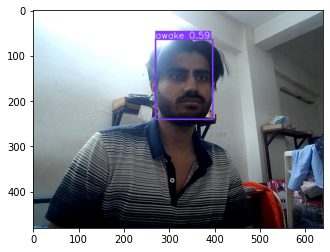

In [26]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()